0.Intro
inner_버스승차인원

지하철과 함께 시민들의 발이 되어 주는 버스.

특히, 제주도같이 지하철을 이용할 수 없는 곳에서는 더더욱 소중하죠.

하지만, 필요할 때 타지 못한다면 결국은 무용지물!

승객들이 버스를 효율적으로 이용할 수 있게 하려면 어떻게 운영해야 할까요?

December, 2022, ver.001 | All rights reserved by Dacon

버스 운행 시간 예측 프로젝트에 참여하신 데이커 여러분, 환영합니다. 🙌
한국처럼 대중교통이 잘 발달한 나라도 세계적으로 드물다고 하죠.
특히나 도서 지방은 지리적 특성상 지하철을 설치하기 어려워 버스 의존도가 내륙에 비하여 더 높은 것이 현실입니다.

다 함께 제주도의 버스 운행 시간을 예측해서 더 쾌적한 제주도를 만들어 볼까요?

물류/운송 프로젝트 초보자도 함께하는 데이콘 프로젝트 교육, go go!

[프로젝트의 목적]

버스 운행 시간, next_arrive_time 을 예측

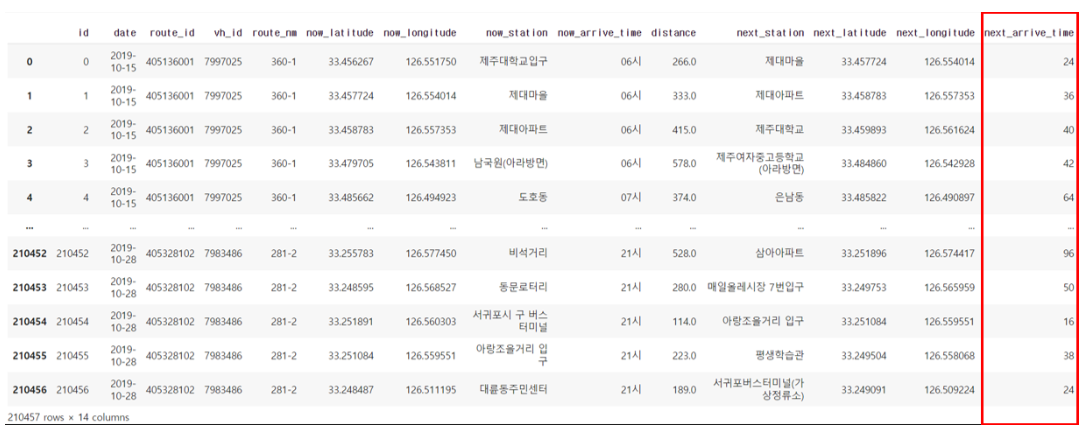

앞서 데이터 불러오기에서 test 데이터에는 train 데이터와 달리
버스 운행 시간, next_arrive_time 열이 없었던 것을 기억하시나요?

또 정답 제출용 파일인 sample_submission에는 next_arrive_time(버스 운행 시간) 데이터가 모두 0으로 채워져 있는 것을 보았습니다.

이를 통해 next_arrive_time(버스 운행 시간)을 예측하는 문제인 것을 확인했었죠!

다시 정리하면, 이번 프로젝트의 목적은 날짜, 운행 정보, 역 정보, 운행 시각 정보를 가지고 버스 운행 시간을 예측하는 것입니다.

1.데이터 불러오기
지난 시간과 마찬가지로 pandas 라이브러리의 read_csv() 함수를 이용해 분석에 사용할 데이터를 불러오겠습니다.

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
train.head(3)

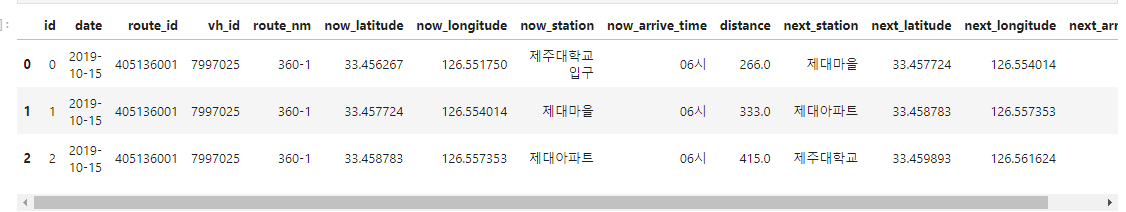

2.데이터 로드 실습
[문제 1]

In [ ]:
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

[EDA]

EDA(Exploratory Data Analysis, 탐색적 자료 분석)란, 수집한 데이터를 분석하기 전에 데이터의 특성을 관찰하고 이해하는 단계입니다.

EDA 과정

데이터 수집
시각화 탐색
패턴 도출
인사이트 발굴
EDA 방법

1) Target을 주인공으로

Feature를 주인공으로
Target과 Feature의 관계

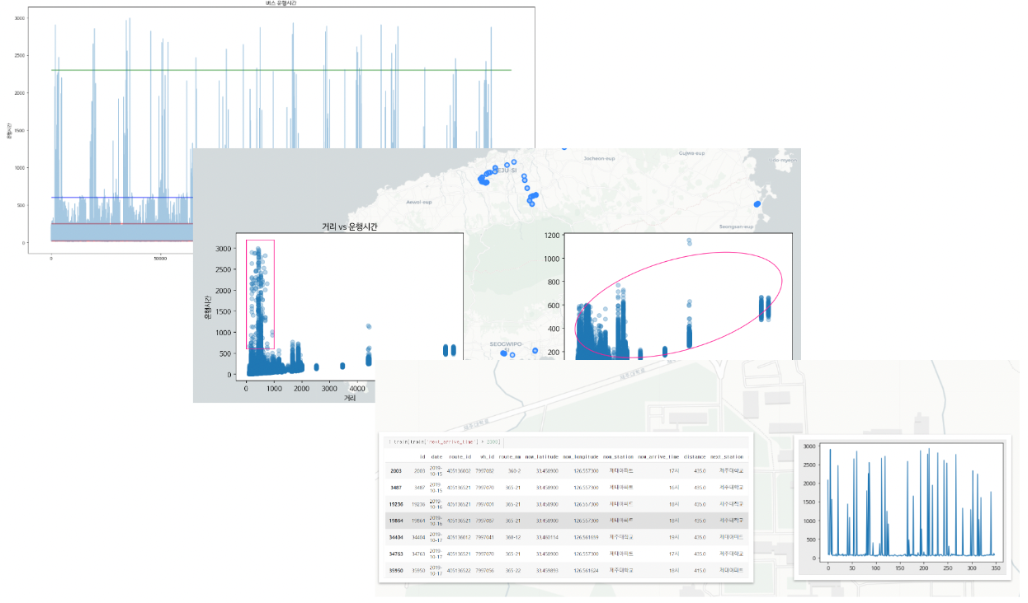

* Target을 주인공으로 한 EDA <=
* Feature를 주인공으로 한 EDA, Target과 Feature의 관계

버스 운행 시간 데이터 중 예측하고자 하는 대상, 즉 Target 은 운행 시간(next_arrive_time)입니다.

next_arrive_time을 주인공으로 한 EDA를 먼저 진행해 봅시다.

3.운행 시간 시각화
next_arrive_time을 plot(선 그래프)로 시각화하여 살펴봅니다.

In [ ]:
# 파이썬 warning 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트를 사용하기 위한 코드
fe = fm.FontEntry(fname = 'NotoSansKR-Regular.otf', name = 'NotoSansKR')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='NotoSansKR')

## 코드 작성          
train['next_arrive_time'].plot(figsize=(20,10), alpha=0.4)

plt.title('버스 운행시간')
plt.xlabel('인덱스')
plt.ylabel('운행시간')

plt.show()

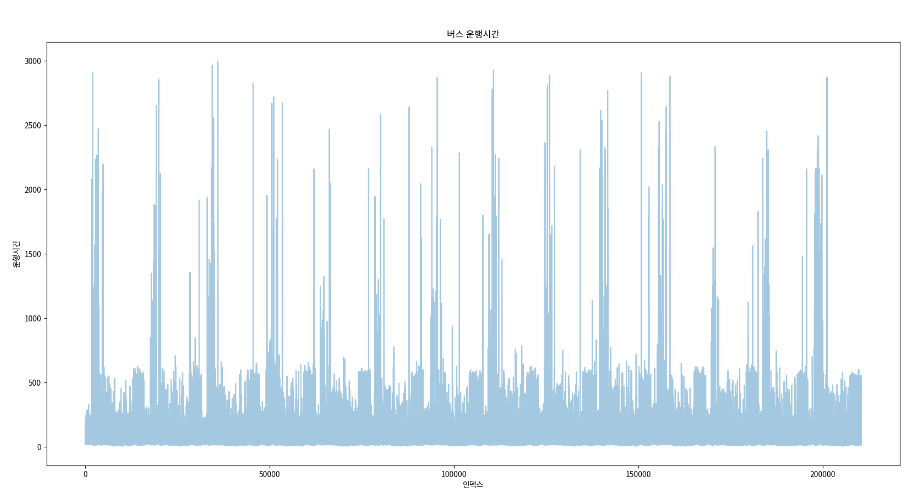

4.운행 시간 분포 시각화 실습
위에서 발견한 특징을 한눈에 알아보기 위해 각 구간별로 수평선을 그어 봅시다.
이번엔 직접 해 볼까요?

[문제 2]

운행 시간을 5개 구간으로 나누기
~ 20 미만
20 이상 ~ 250 미만
250 이상 ~ 600 미만
600 이상 ~ 2300 미만
2300 이상 ~

In [ ]:
train['next_arrive_time'].plot(figsize=(20,10), alpha=0.4)

plt.title('번스 운행시간')
plt.xlabel('인덱스')
plt.ylabel('운행시간')

plt.hlines(y=20, xmin=0, xmax=len(train), color='red')
plt.hlines(y=250, xmin=0, xmax=len(train), color='red')
plt.hlines(y=600, xmin=0, xmax=len(train), color='blue')
plt.hlines(y=2300, xmin=0, xmax=len(train), color='green')

plt.show()

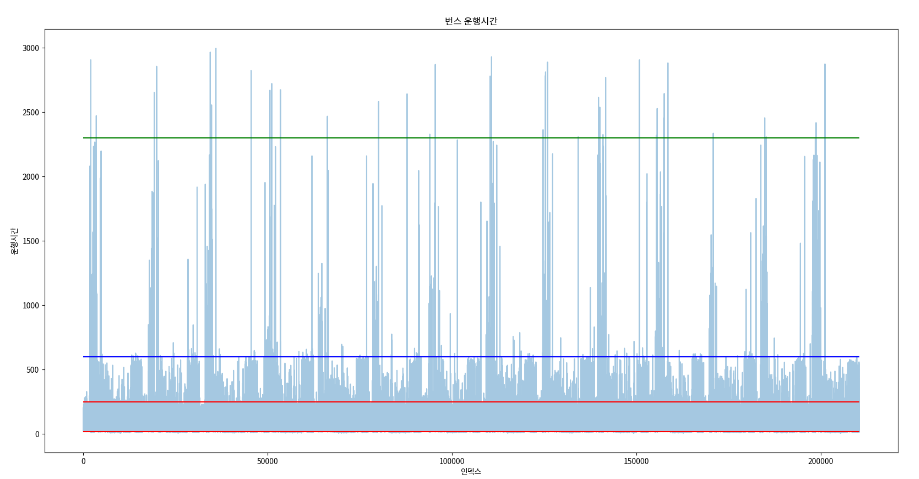

5.버스 운행 시간 구간별 데이터셋
더 자세히 살펴보기 위해 버스 운행 시간 구간별로 5개의 데이터셋을 생성하겠습니다.

* 데이터셋의 이름은 a부터 e로 지정합니다.

In [ ]:
a = train[train['next_arrive_time']<20]
b = train[(train['next_arrive_time']>=20) & (train['next_arrive_time']<250)]
c = train[(train['next_arrive_time']>=250) & (train['next_arrive_time']<600)]
d = train[(train['next_arrive_time']>=600) & (train['next_arrive_time']<2300)]
e = train[(train['next_arrive_time']>=2300)]

6.버스 운행 시간 구간별 횟수 시각화
[문제 3]

각 데이터셋의 길이를 구하고 bar(막대 그래프)를 그려 버스 운행 시간 구간별 횟수를 비교해 보세요.

In [ ]:
x=['20미만', '20~250', '250~600', '600~2300', '2300이상']
y=[len(a), len(b), len(c), len(d), len(e)]

plt.figure(dpi=150)
plt.title('버스 운행시간 구간 별 횟수')
plt.xlabel('버스 운행시간 구간')
plt.ylabel('횟수')

plt.bar(x,y)
plt.show()

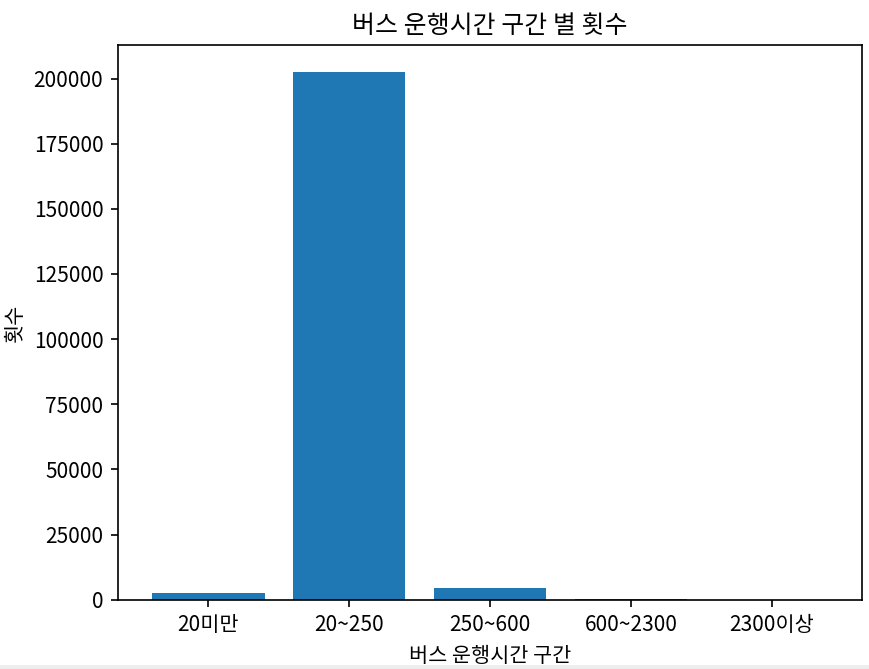

7.버스 운행 시간 b구간이 차지하는 비율 그래프
b구간이 차지하는 비율을 pie(파이 차트)로 시각화합시다.

b구간이 아닌 나머지가 차지하는 비율 = 1 - (b구간이 차지하는 비율)

In [ ]:
x = ['b구간', '나머지']
y = [len(b)/len(train), (1-len(b)/len(train))]

plt.figure(dpi=150)

plt.title('버스 운행시간 구간 비율')

plt.pie(y, labels=x)
plt.legend()
plt.show()

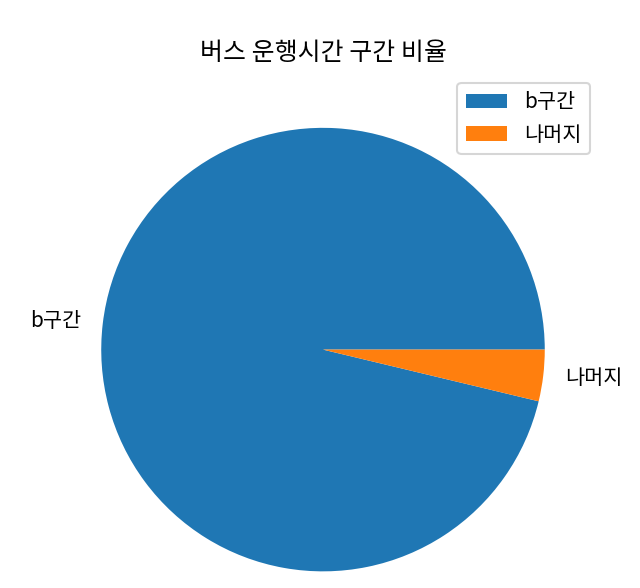

8.버스 운행 시간 히스토그램
이번에는 hist(히스토그램)으로 시각화해 봅시다.

In [ ]:
plt.figure(dpi=150)

plt.title('버스 운행시간 히스토그램')
plt.xlabel('운행시간')
plt.ylabel('횟수')

plt.hist(train[train['next_arrive_time']<600]['next_arrive_time'], bins=20)
plt.show()

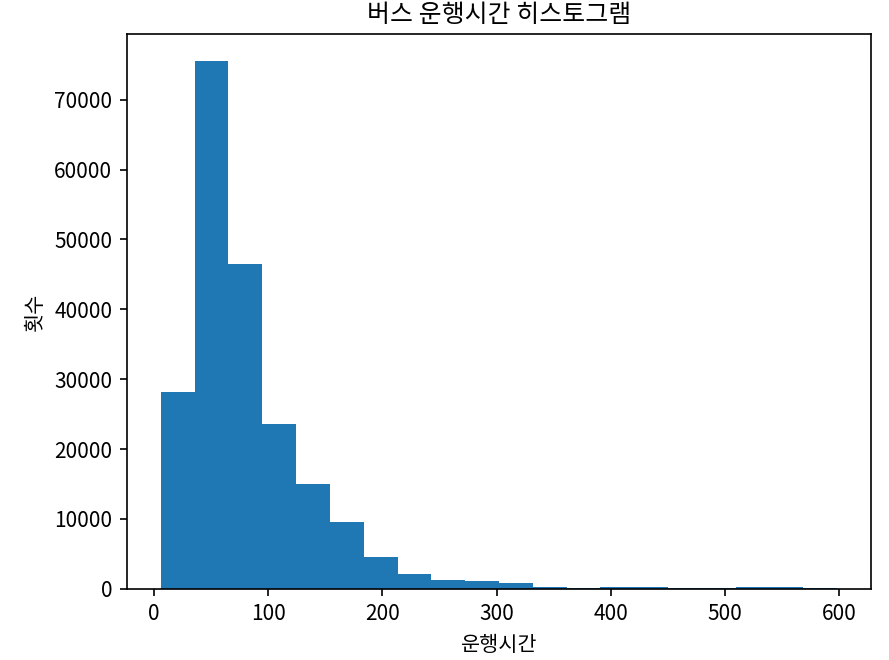

9.데이터셋과 나머지 거리 평균
운행 시간이 가장 짧은 a 데이터셋의 거리 평균과 나머지의 거리 평균을 비교합니다.

In [ ]:
x = ['운행시간<20', '운행시간>=20']
y = [a['distance'].mean(), pd.concat([b,c,d,e])['distance'].mean()]

plt.figure(dpi=150)

plt.title('운행시간 vs 거리')
plt.xlabel('운행시간')
plt.ylabel('거리')

plt.bar(x,y)
plt.show()

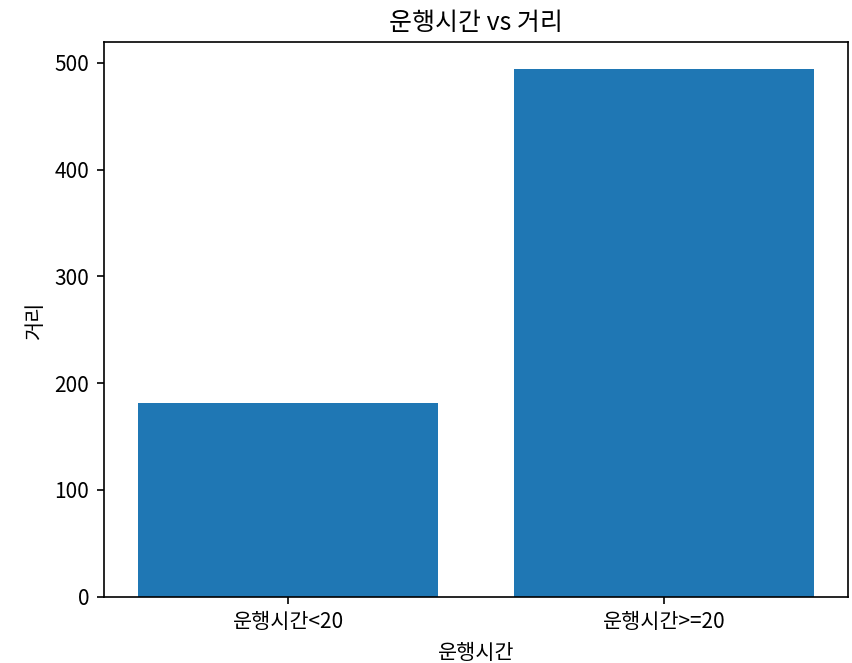

예상대로 운행 시간이 짧으면 거리도 짧네요!

10.b 데이터셋과 c 데이터셋 거리 평균
[문제 4]
나머지 데이터셋 중 b 데이터셋과 c 데이터셋의 거리 평균을 좀 더 살펴볼까요?
이번엔 직접 해 봅시다!

In [ ]:
x = ['20~250', '250~600']
y = [b['distance'].mean(), c['distance'].mean()]

plt.figure(dpi=150)

plt.title('운행시간 vs 거리')
plt.xlabel('운행시간')
plt.ylabel('거리')

plt.bar(x,y)
plt.show()

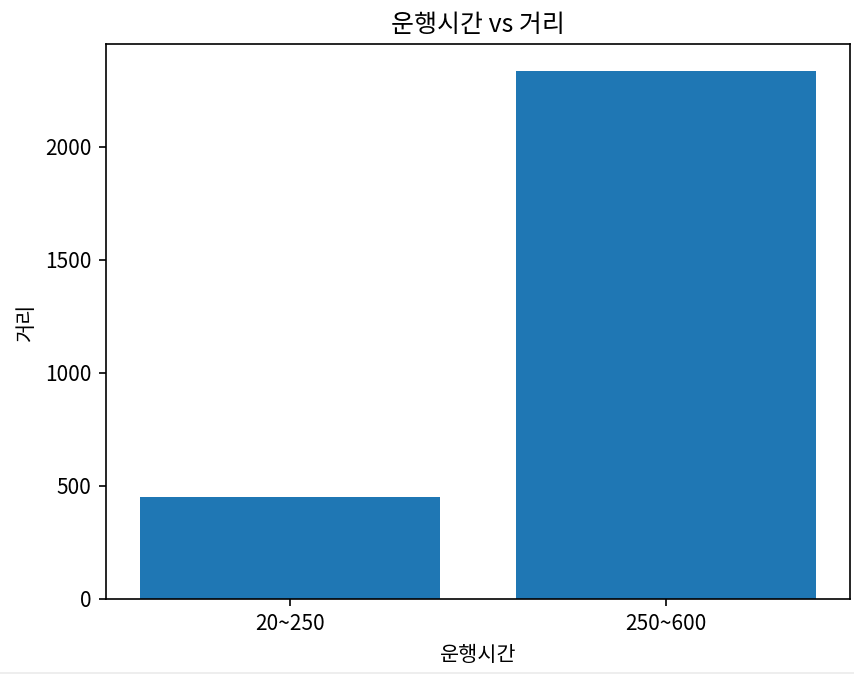

운행 시간이 250 이상인 데이터부터 거리가 늘어나네요!

11.거리 vs 운행 시간 산점도
우리는 운행 시간 구간별로 거리의 평균(mean)을 구해 시각화하여
운행 시간이 짧으면 거리도 짧을 것이라는 판단을 내렸습니다.

그런데 평균을 '전체 데이터를 대표하는 값'이라고 말할 수 있을까요?

이를 확인하기 위해 전체 데이터 중 거리를 x좌표로, 운행 시간을 y좌표로 하여 scatter(산점도 그래프)를 그려 보겠습니다!

In [ ]:
import matplotlib.patches as patches

x = train['distance']
y = train['next_arrive_time']

plt.figure(dpi = 150)

plt.title('거리 vs 운행시간')
plt.xlabel('거리')
plt.ylabel('운행시간')

plt.scatter(x,y, alpha = 0.3)

plt.show()

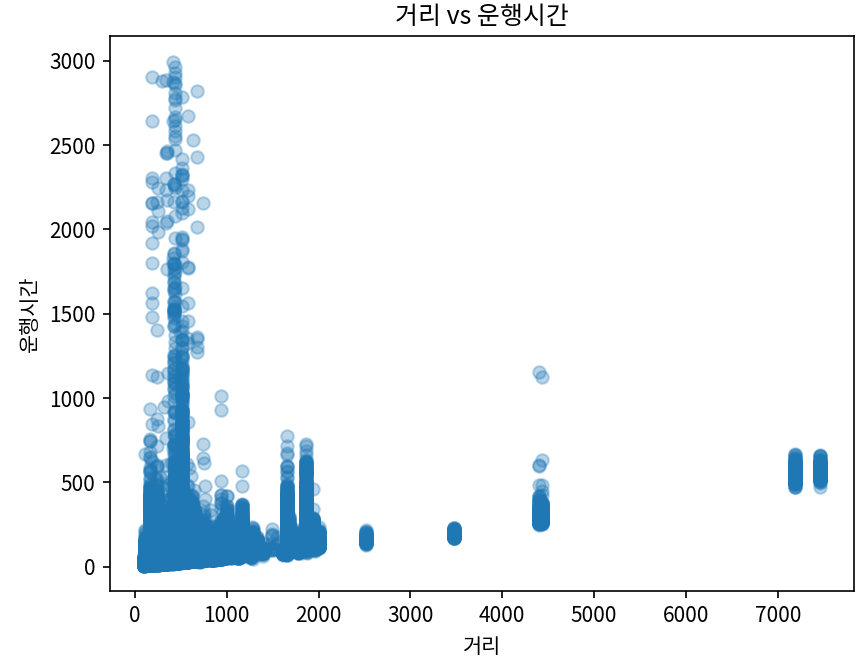

어떤 특징을 발견했나요?

거리 1000 이상인 데이터에서는 거리가 증가할수록 운행 시간도 선형적으로 증가하는 모습이 보이네요.
거리 0 ~ 1000 구간에서는 운행 시간의 분포가 일정하지 않으며, 최대 3000까지 분포하므로 이상치가 존재하는 것 같습니다.
12.운행 시간 이상치
거리 0 ~ 1000 구간에서 일정하지 않은 운행 시간의 분포를 직사각형(deeppink색)으로 표시하겠습니다.

In [ ]:
import matplotlib.patches as patches

x = train['distance']
y = train['next_arrive_time']

plt.figure(dpi = 150)

plt.title('거리 vs 운행시간')
plt.xlabel('거리')
plt.ylabel('운행시간')

plt.scatter(x,y, alpha = 0.3)

# 이상치 표시하기 - 직사각형
plt.gca().add_patch(
    patches.Rectangle(
        (0, 600),
        1000, 2600,               
        edgecolor = 'deeppink',
        fill=False,
    ))

plt.show()

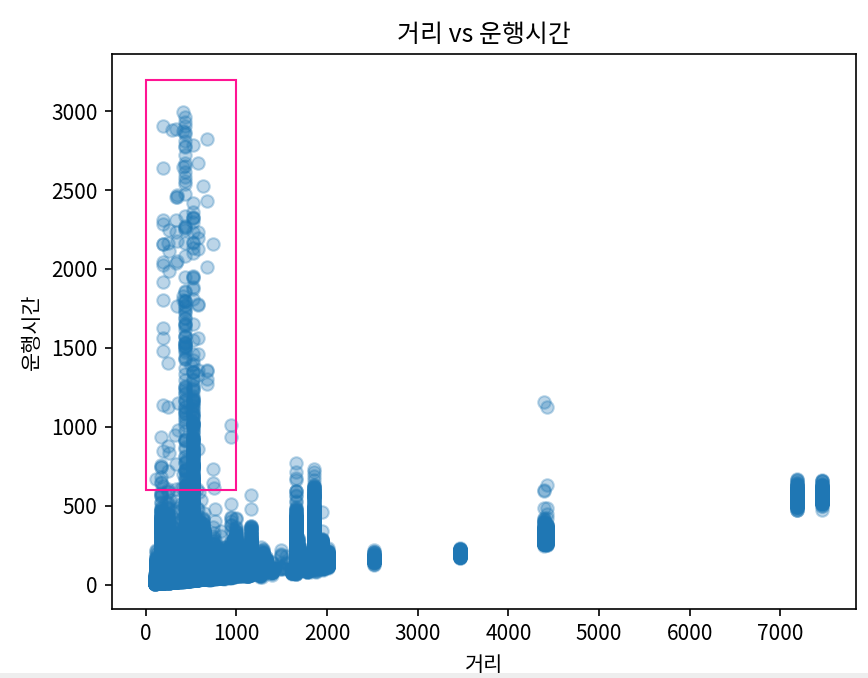

이상치는 거리가 1000 이하일 때, 운행 시간이 600 이상인 데이터라고 볼 수 있겠네요!

이 데이터를 자세히 살펴볼까요?

이상치 데이터는 어떤 특징이 있을까요?
이상치 데이터의 좌표를 folium 라이브러리로 지도에 표시하기 위해선 아래와 같은 코드가 필요합니다!

앞서와 마찬가지로, 이번 프로젝트에서는 코드를 참고만 하는 선에서 진행하겠습니다.

    import folium

    locations = train[(train['distance'] <= 1000) & (train['next_arrive_time'] >= 600)][['next_latitude', 'next_longitude']].values.tolist()

    center = [((train[['now_latitude', 'now_longitude']].loc[1].values[0])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[0]))/2, 
          ((train[['now_latitude', 'now_longitude']].loc[1].values[1])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[1]))/2]
          
    m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron')

    for location in locations:
        folium.Circle(
            radius=300,
            location=location,
            fill=True
        ).add_to(m)

    m

출력될 결과를 확인해 보시죠!

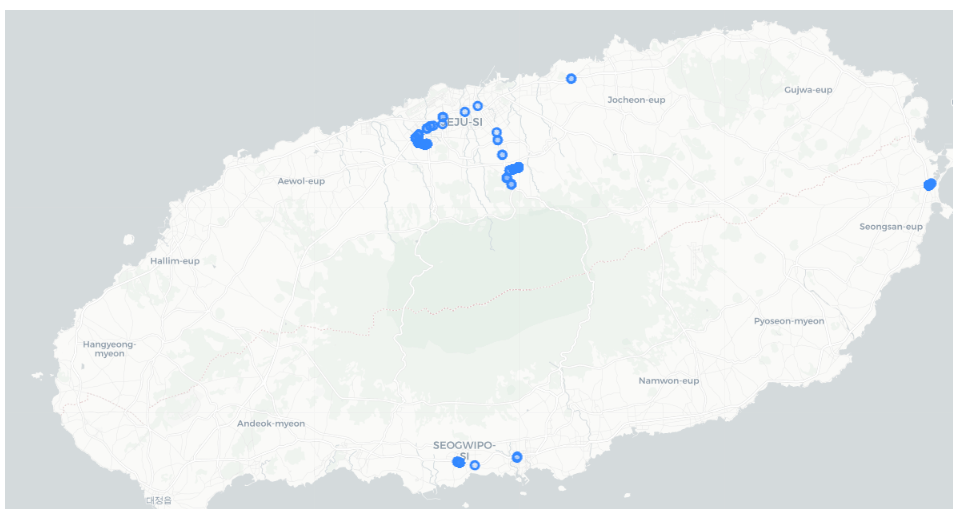

이상치에 해당하는 데이터는 제주대학교를 포함하여 도심에 주로 분포하는 것 같습니다!

13.거리가 1000 이하일 때, 운행 시간이 600 이상인 데이터 시각화
[문제 5]
이번에는 이상치가 아닌, 즉 거리가 1000 이상이면서 운행 시간은 600 이하인 데이터를 scatter(산점도 그래프)로 그려 볼까요?
직접 해 봅시다!

In [ ]:
temp = train[(train['distance'] >= 1000) | (train['next_arrive_time'] <= 600)]

x = temp['distance']
y = temp['next_arrive_time']

plt.figure(dpi = 150)
plt.scatter(x,y, alpha = 0.3)

# 운행시간 분포 표시하기 - 타원
plt.gca().add_patch(
   patches.Ellipse(
      (4000, 600),
      8000, 800,               
      edgecolor = 'deeppink',
      fill=False,
      angle=3
   ))

plt.show()

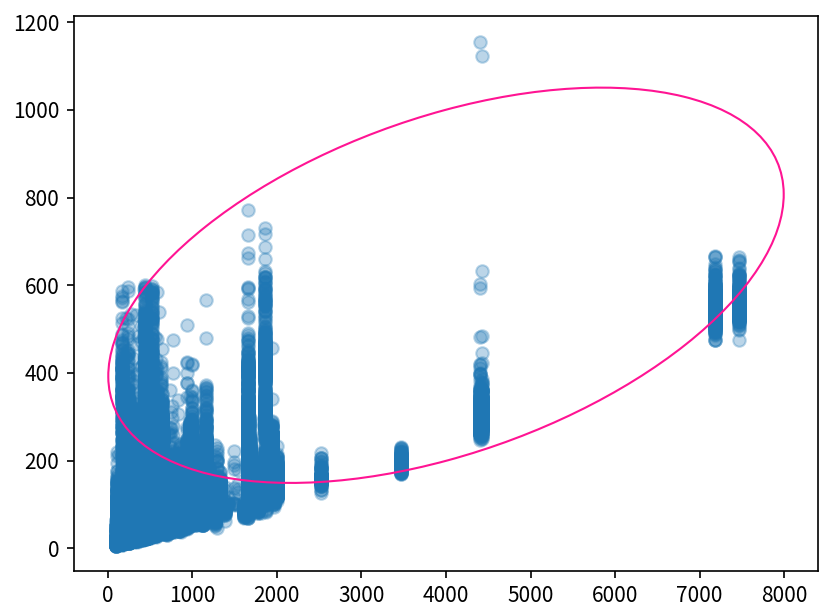

이상치가 아닌 데이터는 거리와 운행 시간은 거리가 증가할수록 운행 시간도 증가하는 비례관계이네요.

앞서 운행 시간을 5개 구간으로 나누어 EDA를 진행했었는데요,

~ 20 미만
20 이상 ~ 250 미만
250 이상 ~ 600 미만
600 이상 ~ 2300 미만
2300 이상
이 중 운행 시간이 가장 긴, '2300 이상' 구간의 데이터를 더 살펴보겠습니다.

[시각화를 위한 코드는 아래와 같습니다!]

#운행 시간이 2300 이상인 데이터의 좌표 정보 (list)
    locations = train[train['next_arrive_time'] >= 2300][['next_latitude', 'next_longitude']].values.tolist()

#지도 중심 좌표
    center = [((train[['now_latitude', 'now_longitude']].loc[1].values[0])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[0]))/2, 
              ((train[['now_latitude', 'now_longitude']].loc[1].values[1])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[1]))/2]

#지도 그리기
    m = folium.Map(location=center, zoom_start=11)

#점(Circle) 표시하기
    for location in locations:
        folium.Circle(
            radius=300,
            location=location,
            fill=True
        ).add_to(m)

    m

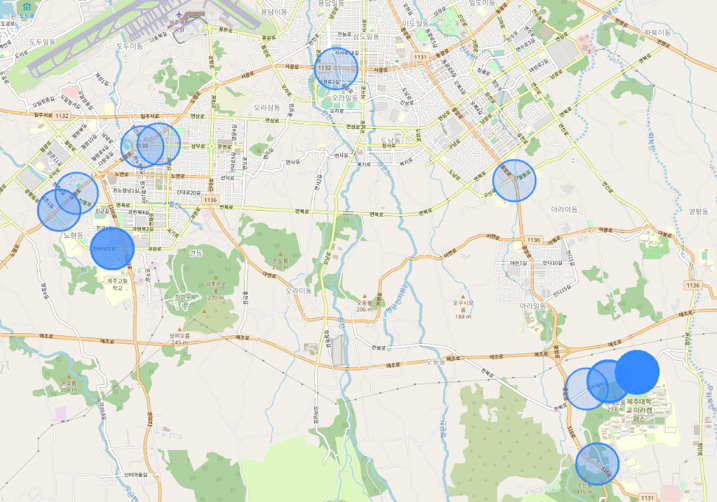

운행 시간이 가장 긴 데이터는 제주대학교에 많이 분포합니다.

제주대학교 데이터를 살펴봅시다!

14.제주대학교 데이터(1)
* 비교를 위해 우선 전체 train 데이터의 제주대학교 정보를 뽑아 볼까요?

In [ ]:
train[(train['next_station'] == '제주대학교')]

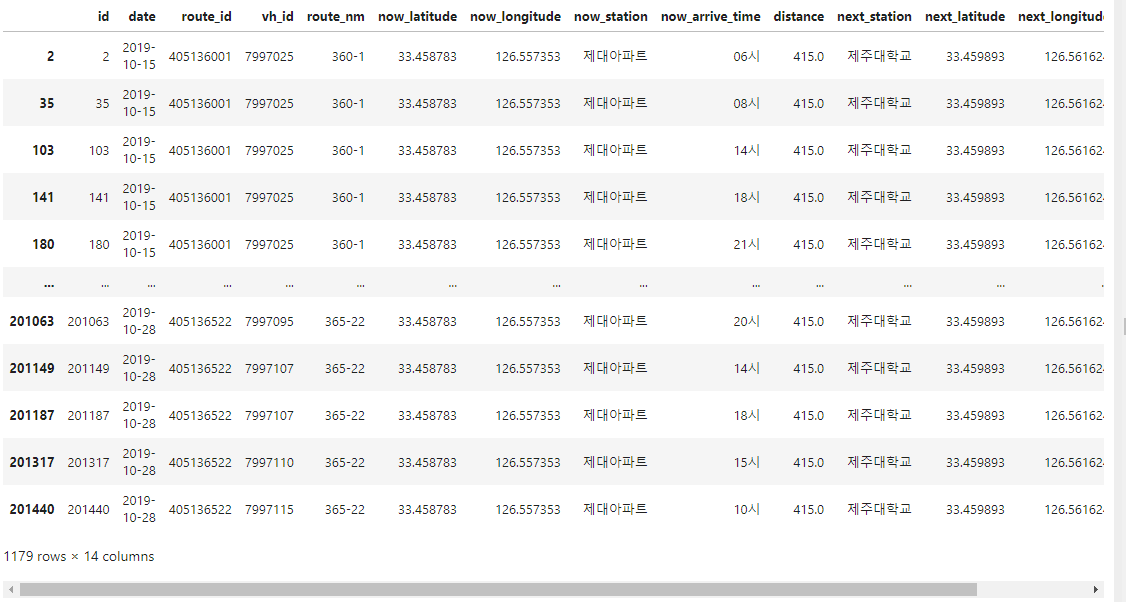

* 이번에는 운행 시간이 2300이상인 제주대학교 정보를 추출해 보겠습니다.

15.제주대학교 데이터(2)_실습
[문제 6]
직접 해 볼까요?

In [ ]:
train[(train['next_station'] == '제주대학교') & (train['next_arrive_time'] >= 2300)]

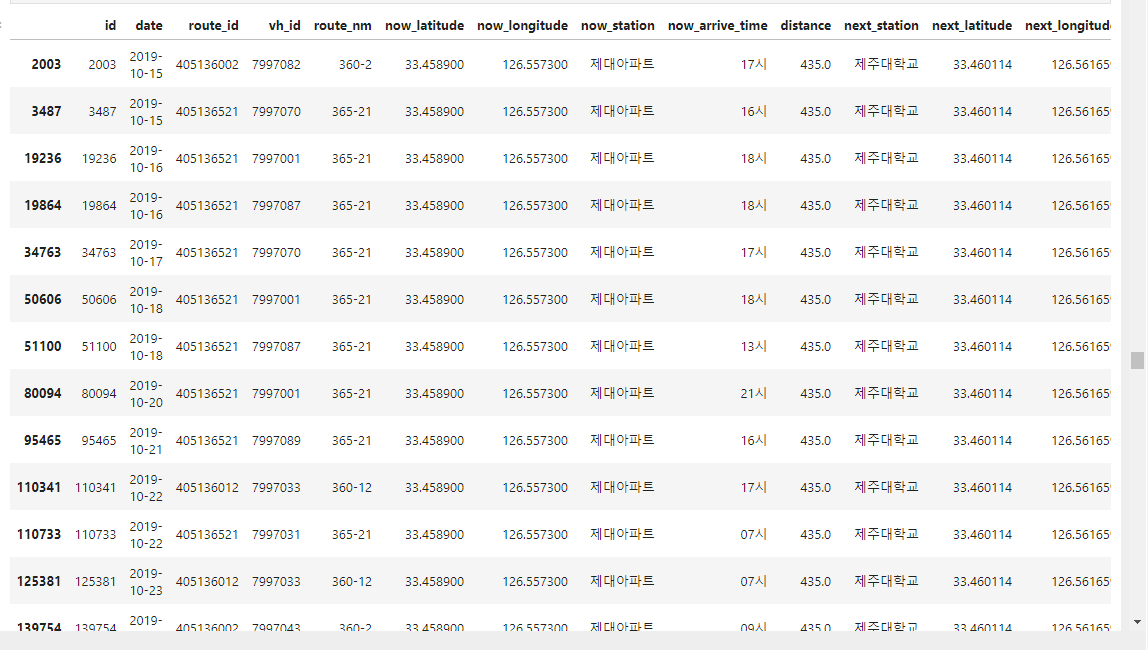

제주대학교의 좌표(next_latitude, next_longitude)가 다른 것을 발견하셨나요?

운행 시간이 긴 데이터는 좌표가 다른 것을 확인했습니다.

16.제주대학교 좌표가 동일하지 않은 데이터
우선 전체 train 데이터에서 제주대학교 좌표 정보를 살펴보겠습니다.

In [ ]:
train[(train['next_station'] == '제주대학교')][['next_latitude', 'next_longitude']]

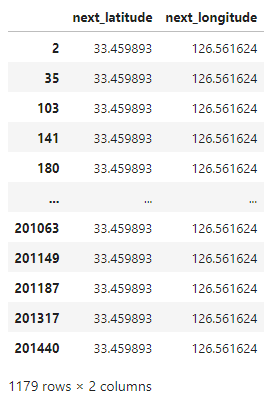

17.제주대학교까지 가면서 운행 시간이 긴 좌표
그럼 운행 시간이 긴 데이터의 제주대학교 좌표 정보는 어떨까요?

In [ ]:
train[(train['next_station'] == '제주대학교') & (train['next_arrive_time'] > 2300)][['next_latitude', 'next_longitude']].iloc[0].values.tolist()

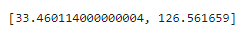

[제주대학교 역 좌표 지도에 찍기]

제주대학교 좌표를 locations 변수에 할당합니다.
(next_station이 제주대학교인 열, next_station이 제주대학교이면서 next_arrive_time이 2300을 초과하는 행)

지도의 중심 좌표를 center 변수에 할당합니다.

center와 loactions을 이용하여 folium으로 시각화를 해 보겠습니다.
이번에도 역시 코드를 참고해 볼까요?

#제주대학교 좌표
    locations = [train[(train['next_station'] == '제주대학교')][['next_latitude', 'next_longitude']].iloc[0].values.tolist(),
                 train[(train['next_station'] == '제주대학교') & (train['next_arrive_time'] > 2300)][['next_latitude', 'next_longitude']].iloc[0].values.tolist()]

#지도 중심 좌표
    center = [((train[['now_latitude', 'now_longitude']].loc[1].values[0])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[0]))/2, 
              ((train[['now_latitude', 'now_longitude']].loc[1].values[1])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[1]))/2]

#지도 그리기
    m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron')

#점 찍기
    for i, location in enumerate(locations):
        folium.Circle(
            radius=10,
            location=location,
            tooltip=i,
            fill=True
        ).add_to(m)

    m

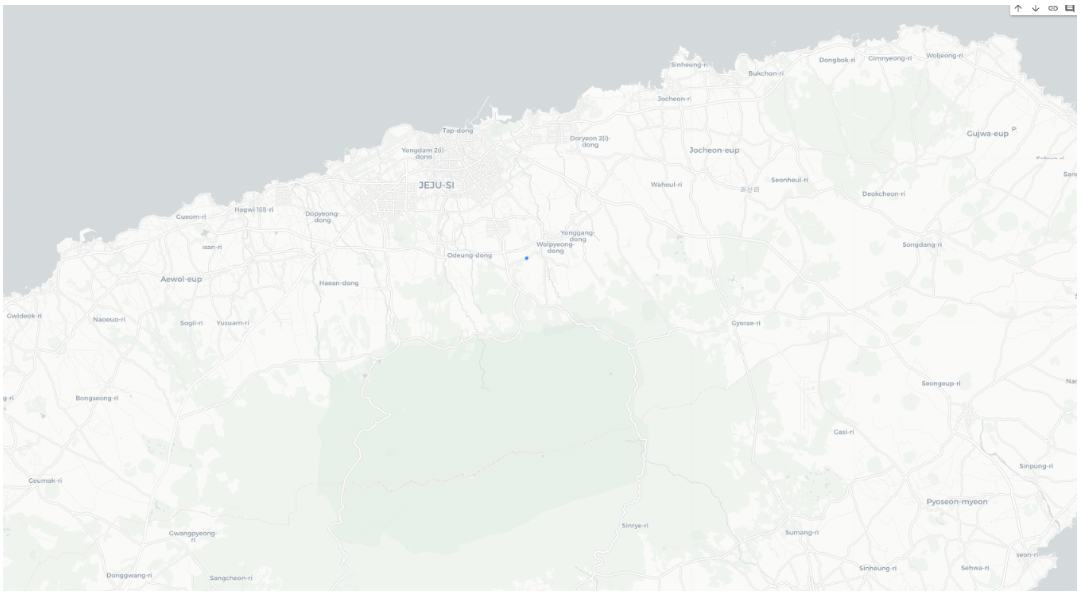

위 지도를 확대하여 살펴보면

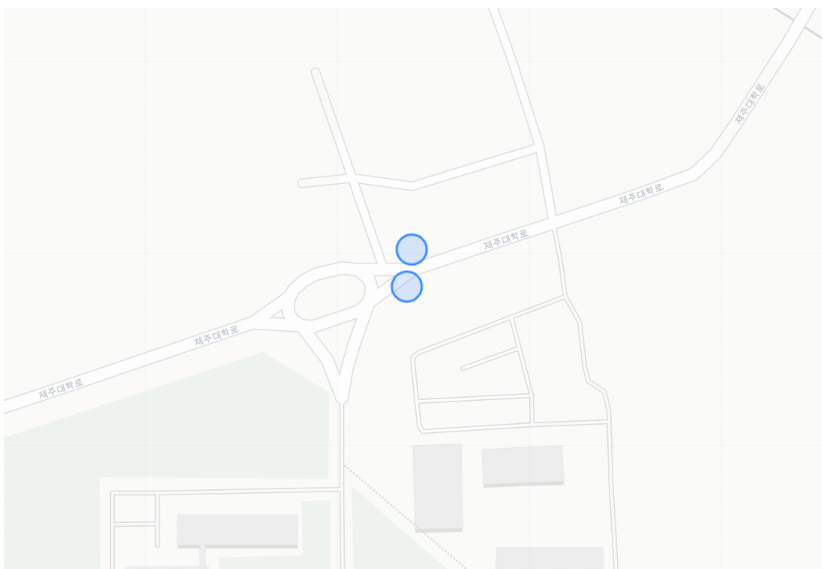

제주대학교

다음과 같이 제주대학교 좌표가 2개인 것을 알 수 있습니다!

18.좌표로 운행 시간을 예측할 수 있는가?
제주도의 좌표 중 운행 시간이 긴 데이터에 해당하는 좌표(경도)를 가지고 운행 시간을 시각화해 봅시다!

In [ ]:
# 운행 시간이 긴 데이터
X = train[train['next_longitude'] == 126.561659]['next_arrive_time'].reset_index(drop=True).index
Y = train[train['next_longitude'] == 126.561659]['next_arrive_time'].reset_index(drop=True).values

plt.plot(X,Y)
plt.show()

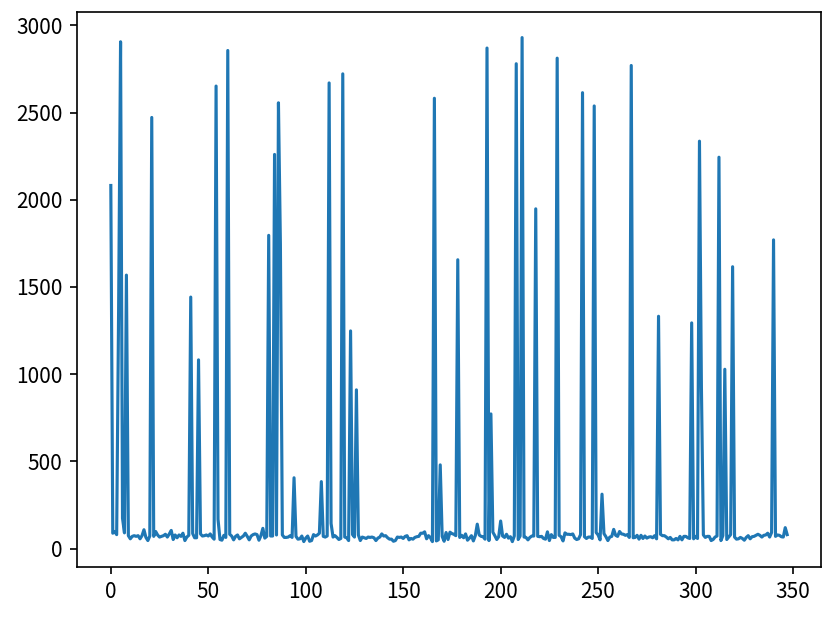

그래프를 보니 운행 시간이 일정하게 긴 시간대로 나오지 않네요!
운행 시간이 긴 데이터는 좌표로 예측이 불가능하다고 볼 수 있습니다.

이제 데이터 살펴보기 단계와 EDA 단계에서 확인한 데이터의 특징을 바탕으로 전처리 작업을 진행해 보도록 합시다!

19.값에 숫자 부여
지난 스테이지에서 데이터 분석을 위해 문자형 데이터를 숫자형으로 전처리하도록 정의한 transform_df 함수를 사용했던 것, 기억하시나요?

아래와 같이 만들었었죠!

unique() 함수를 사용해 route_nm, now_station, next_station 의 고윳값들을 my_list 라는 이름의 단일 리스트로 저장합니다.
enumerate() 함수를 사용해 my_list 요소를 key로, 순서를 value로 하는 my_dict 사전을 만들어 줍니다.
* enumerate()는 0부터 1씩 증가하는 숫자를 부여하는 함수입니다. 순서 정보가 필요할 때 사용됩니다.
이번 스테이지에서도 똑같이 사용해 보도록 하겠습니다!

In [ ]:
my_list = list(train['route_nm'].unique()) + list(train['now_station'].unique()) + list(train['next_station'].unique())
my_dict = {text : i for i, text in enumerate(my_list)}
my_dict

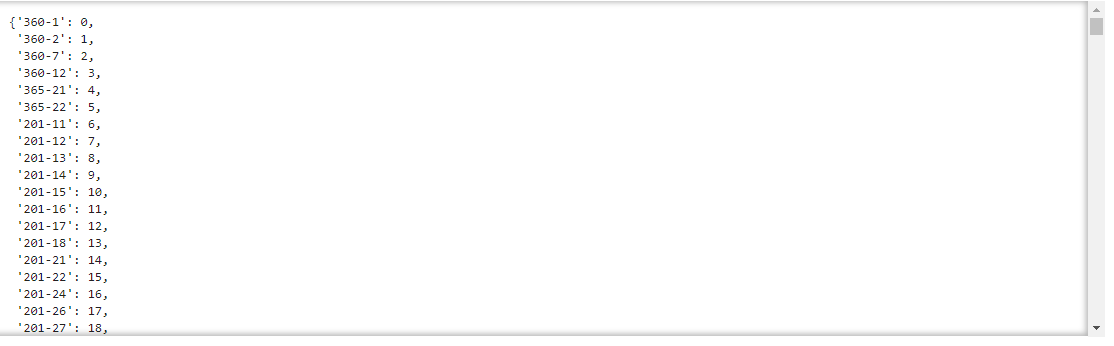

20.범주형 -> 수치형 자료로 변환 실습
- route_nm / now_station / next_station
my_dict를 사용해 route_nm, now_station, next_station 컬럼을 Categorical Data(범주형 자료)에서 Numerical Data(수치형 자료)로 변환합시다.

applymap() 함수를 사용하면 요소별로 함수를 적용할 수 있습니다.

lambda x: my_dict[x]는 my_dict의 key값을 value값으로 대체하는 함수입니다.

[문제 7]

In [ ]:
# 데이터 전처리 함수
def transform_df(df:pd.DataFrame):

    # my_dict 적용
    df[['route_nm', 'now_station', 'next_station']] = df[['route_nm', 'now_station', 'next_station']].applymap(lambda x:my_dict[x])

    # 시간 정보 str -> int 데이터 타입 변환 함수
    def text_to_time(text:str):
        return int(text[:2])

    # 시간 데이터 타입 변환 함수 적용
    df['now_arrive_time'] = df['now_arrive_time'].map(text_to_time)
  
    return df
 
train = transform_df(train)
test = transform_df(test)

21.이상치 제거 실습
[문제 8]
앞서 EDA를 통해 운행 시간이 1000 초과인 데이터는 이상치라고 판단하여,
운행 시간이 1000 이하인 데이터만 사용해 보도록 하겠습니다.

In [ ]:
train = train[train['next_arrive_time'] <= 1000]

22.Feature Selection 실습
[문제 9]
모델링을 하기 앞서, 독립변수 X와 종속변수(타깃변수) y를 설정해 볼까요?

해당 프로젝트의 목표는 버스 운행 시간의 예측값을 맞히는 것이기 때문에, 예측할 변수 Target은 next_arrive_time 입니다.

그럼 모델링을 위해 train 데이터에서 학습에 사용할 변수 X와 예측할 변수 y를 분리해 보겠습니다.

이제 종속변수를 제외한 독립변수를 설정해 볼까요?
우리가 모델을 학습시킬 때 쓸 독립변수는 총 11개입니다.

route_id, vh_id, route_nm, now_latitude, now_longitude, now_station, now_arrive_time, distance, next_station, next_latitude, next_longitude

In [ ]:
features = train.columns[2:-1]     
target = train.columns[-1]    

X = train[features]     
y = train[target]

[데이터 분리]

모델링 단계에 앞서, 내가 만들 모델이 유의미한지도 알아야 좋은 결론을 도출할 수 있겠죠?

하지만 단순히 주어진 데이터로 train 셋 데이터를 학습시켜서 test 셋에 넣어 예측값을 도출하면, 모델이 적합한지 알 방법이 없어요.
또한 머신러닝 모델에 train 데이터셋만을 학습시킨 후 test 데이터를 모델로 예측하면 성능이 생각보다 낮게 나오는 경우가 발생할 수 있습니다.

이러한 현상을 보통 Overfitting 되었다고 합니다.

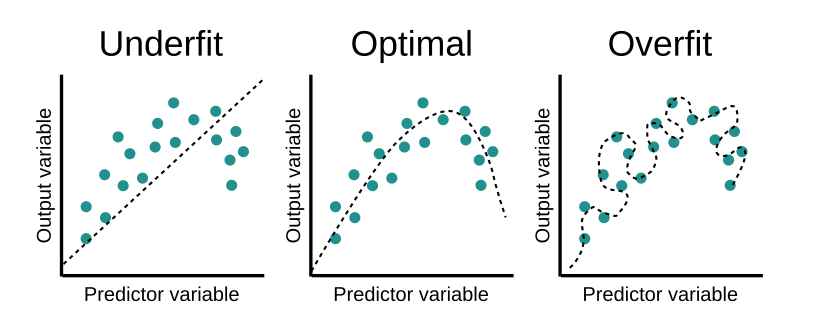

                                 이미지 출처 : educative.io
즉, 현재 모델이 너무 학습 데이터에 의존되어 있어 이를 조금이라도 벗어난 케이스에 대해서는 예측율이 현저히 떨어진다고 이해하시면 됩니다.
따라서 우리는 train 셋 자체에서 test 데이터 셋을 분리시켜 모델의 적합성을 확인해 줄 것입니다.

먼저, train과 test를 분리하는 목적에 대해 정확히 이해해야 합니다.
용어를 정확히 하자면, train / test가 아니라 train / validation이 맞는 표현인데요!

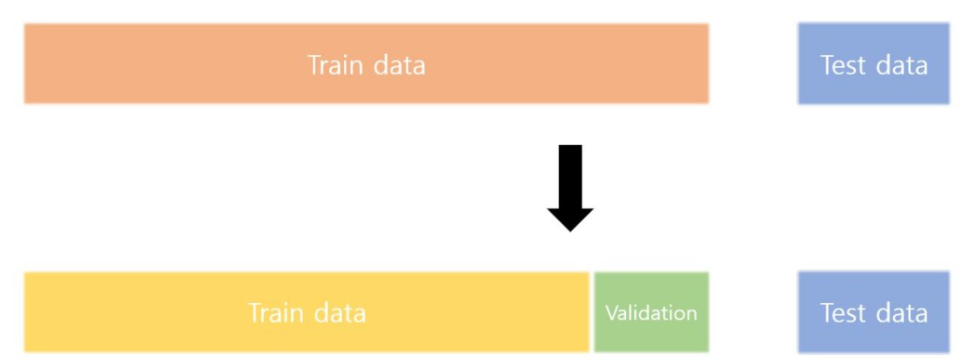

위의 그림과 같이 기존 train, test로 구분되어 있었던 데이터셋에서 train 데이터를 일정 비율의 train / validation으로 쪼갠 다음
train 셋으로 학습 후, validation 셋으로 내가 학습한 모델을 평가해 주는 것입니다.

데이터 분석 경진대회에서는 test 데이터 셋에 대한 정답 정보가 없기 때문에 validation 셋으로 본인이 설계한 모델을 평가해 보는 것이 일반적입니다.

즉, train 셋의 일부를 학습을 시키는 데 쓰고, 나머지 데이터 셋을 validation 셋으로 묶어 모델이 유의미한지 검증하는 데 사용하는 것입니다.
이후 유의미하다면, 실제로 제출할 모델을 만들 때, train 셋 100%를 학습시키면 되겠죠?

자 그럼, train 셋과 vaildation 셋을 분리시켜 보겠습니다!

sklearn의 model_selection 패키지 안에 train_test_split 모듈을 활용하면 손쉽게 train set(학습 데이터 셋)과 test set(테스트 셋)을 분리할 수 있습니다.

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=비율(0~1 사이), random_state=숫자)
X : 학습에 사용되는 독립 변수 데이터 (배열이나 데이터프레임, 이번 데이터에서 document에 해당)
y : 예측하고자 하는 종속 변수 데이터 (이번 데이터에서 label에 해당)
test_size : 테스트용 데이터 개수를 지정. (1보다 작은 실수를 기재할 경우, 비율을 나타냄)
train_size : 학습용 데이터의 개수를 지정. (1보다 작은 실수를 기재할 경우, 비율을 나타냄)
* train_size와 test_size는 둘 중 하나만 기재해도 됨
random_state : 난수 시드 (동일한 데이터셋을 얻기 위한 파라미터)
train_test_split 메소드의 사용법은 다음과 같습니다.

train_test_split 메소드는 총 4개의 값을 반환하고 2개의 값을 필수적으로 채워 줍니다.
반환하는 값은 학습에 사용할 X, y 값, 검증에 사용할 X, y 값 이렇게 총 4개입니다.
입력값으로는 원본 데이터의 X, y을 채워 주어야 합니다.

23.train/test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.1, shuffle=False)

#데이터 shape 확인
print(f"X_train.shape : {X_train.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"X_valid.shape : {X_valid.shape}")
print(f"y_valid.shape : {y_valid.shape}")

test_size = 0.1로 설정하였기 때문에 X_train과 X_valid의 비율이 9:1로 구성된 것을 알 수 있습니다.

아래의 그림으로 모델 검증에 대해 완벽히 이해해 봅시다!

그림으로 모델 검증 알아보기!

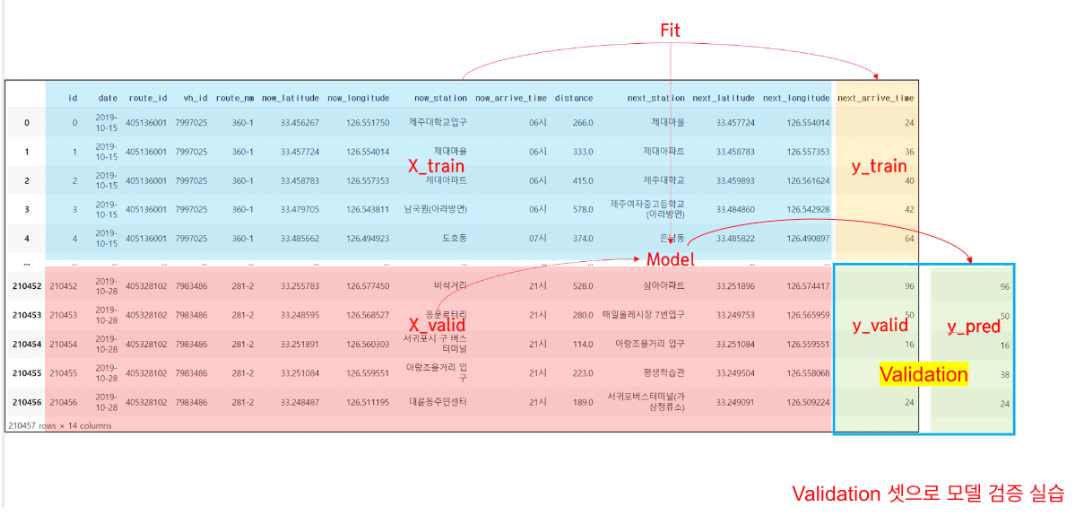

실제 train 데이터를 9:1 로 분할하여 X_train, y_train, X_valid, y_valid 데이터셋을 준비한다.
X_train, y_train 으로 모델을 학습한다.
X_train, y_train 으로 학습된 모델로 X_valid 에 대한 예측값 y_pred 를 얻는다.
X_valid 에 대한 실제값 y_valid 와 예측값 y_pred 을 비교하여 모델 성능을 검증한다.
이해가 되셨나요?

분리한 데이터로 모델을 검증하는 것은 이후 스테이지에서 진행하기로 하고,
그럼 이제 드디어 본격적인 모델링 과정으로 들어가 보죠!

[모델 선택]

랜덤 포레스트(Random Forest) 모델에 관해 알아보도록 하겠습니다.
랜덤 포레스트는 의사결정나무의 단점을 보완하여 더욱 고도화된 앙상블 모델인데요.

모델을 사용하기에 앞서, 개념 먼저 차근차근 살펴봅시다!

랜덤 포레스트(Random Forest)란?

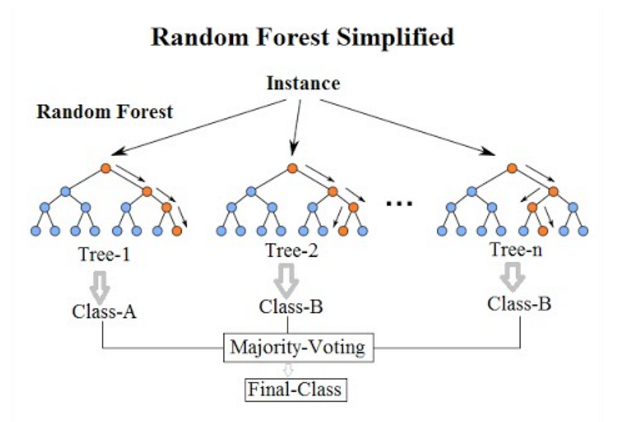

By Venkata Jagannath - https://community.tibco.com/wiki/random-forest-template-tibco-spotfirer-wiki-page
랜덤 포레스트는 한마디로, 훈련 과정에서 만들어진 다수의 의사 결정 나무로부터 분류된 결과를 집계해 최종적으로 분류된 데이터, 또는 평균 예측치를 출력하는 모델입니다.

먼저 의사 결정 나무란, 의사 결정 규칙을 나무 구조로 나타내어 전체 자료를 몇 개의 소집단으로 분류하거나 예측을 수행하는 분석 방법입니다.

이러한 수많은 의사 결정 나무들을 모아 숲을 구성하기에 '포레스트'라고 하는 것인데요.
다만, 각각의 의사 결정 나무들을 만들 때 쓰이는 특징들을 무작위로 선정하기 때문에 '랜덤'이 붙는 것입니다.

모델의 이름 그대로, 랜덤 포레스트는 임의(random)의 숲을 구성하기 때문에 오버 피팅, 즉 과적합을 피할 수 있습니다.
다수의 나무들로부터 분류를 집계하는 만큼, 오버 피팅이 나타나는 나무의 영향력을 줄일 수 있거든요.

또한, 앞서 랜덤 포레스트가 앙상블 모델이라고 언급했었죠?
앙상블(ensemble)은 분류, 회귀 분석 등에서 자주 사용되는 학습 방법의 일종으로, 좋은 성능을 얻기 위해 다수의 학습 알고리즘을 사용하는 것을 말합니다.

랜덤 포레스트에서는 이 앙상블 기법 중에서도 배깅을 이용합니다!

[배깅(Bagging)]

배깅(Bagging)은 'Bootstrap + Aggregating'의 합성어인데요.

여기서 부트스트랩(Bootstrap)이란, 표본 분포를 구하기 위해 데이터를 여러 번 복원 추출(랜덤 샘플링)하는 방법입니다.
이 때, 중복을 허용하기 때문에 단일 데이터가 여러 번 선택될 수도 있습니다.

배깅은 이러한 부트스트랩을 통해서 다양한 데이터셋을 만들고, 이를 학습시킨 모델을 모으는(Arregating) 방법입니다.

즉, 랜덤 포레스트에서 배깅은 모든 의사 결정 나무가 학습 데이터 세트에서 임의로 하위 데이터 세트를 추출하는 과정을 말하는 것이라 이해해 주시면 됩니다.

예를 들어 학습 데이터 세트에 총 1000개의 행이 있다고 하면, 임의로 행을 100개씩 선택해서 의사 결정 나무를 만드는 것입니다.

[배깅 속성 (Bagging Feature)]

의사 결정 나무를 만들 때는 사용될 속성(feature)들을 제한하여 각 나무들에 다양성을 줘야 합니다.
따라서 모든 속성(feature)들에서 임의로 일부를 선택하고, 그중 정보 획득량이 가장 높은 것을 기준으로 데이터를 분할합니다.
만약 데이터 세트에 n개의 속성이 있는 경우, n 제곱근 개수만큼 무작위로 선택하는 것이 일반적입니다. (A rule of thumb)
예를 들어 총 25개의 속성이 있으면 그중에서 n 제곱근인 5개의 속성만 뽑아서 살펴본 후, 정보 획득량이 가장 높은 걸 기준으로 데이터를 분할하는 것입니다.

24.모델 선정
랜덤 포레스트 모델 역시 sklearn 패키지를 이용해 간단하게 사용할 수 있습니다.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

25.모델 학습 실습
[문제 10]
이제 모델을 학습 및 예측시켜 볼까요?

선언된 모델은 fit() 메소드를 이용해 학습시킬 수 있어요.

In [ ]:
model.fit(X, y)

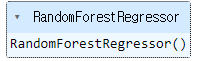

학습된 모델에 predict() 메소드를 이용해 결괏값을 예측할 수 있어요.

26.모델 예측

In [ ]:
# 학습된 모델을 이용해 결괏값 예측 후 상위 10개의 값 확인
predict = model.predict(test[features])
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(predict[:10])

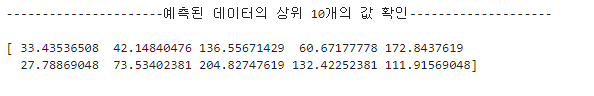

27.제출 파일 생성 및 제출
[문제 11]
앞서 sample_submission.csv 제출용 파일을 이용하여
우리가 모델링으로 예측한 next_arrive_time 값을 채워 보죠!

직접 해 봅시다!

In [ ]:
submission['next_arrive_time'] = predict     
submission.head()

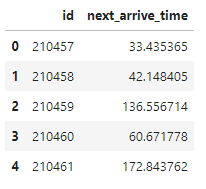

28.csv 파일 생성
submission이 채워졌습니다.

그럼 지난 시간과 마찬가지로 제출용 파일 submission.csv을 생성해 보겠습니다.
EDA를 통해 전처리를 거쳐 모델링한 값으로 말이죠!

In [ ]:
submission.to_csv('submission.csv', index=False)